In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\ROOPSHREE\Downloads\FLIPROBO ASSIGNMENT\3rd Phase evaluation Project_27062024\Automobile_insurance_fraud\Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,Age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
df.shape

(1000, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education            1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.columns

Index(['months_as_customer', 'Age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [7]:
df.isna().sum()

months_as_customer             0
Age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education              0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

N    753
Y    247
Name: fraud_reported, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

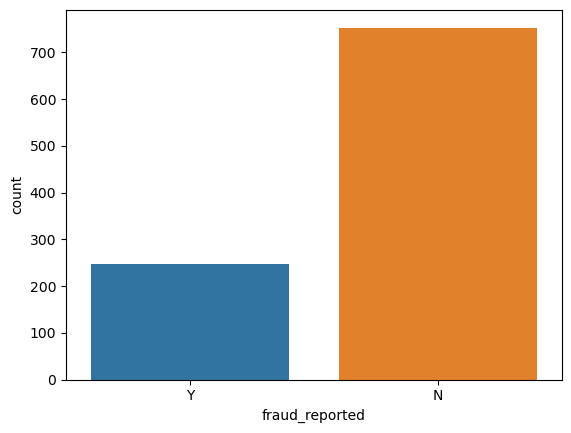

In [8]:
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported',data=df)

In [9]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<Axes: xlabel='policy_state', ylabel='count'>

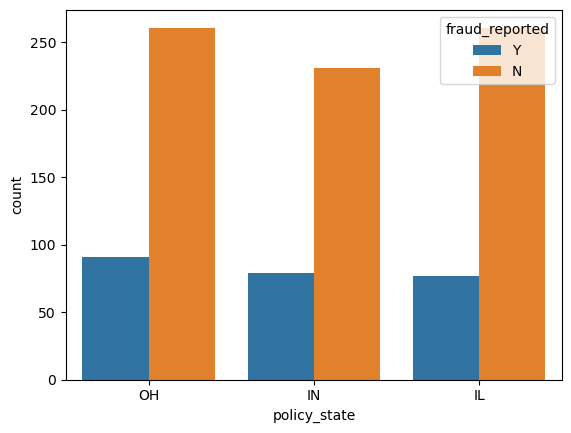

In [10]:
sns.countplot(x='policy_state',data=df,hue='fraud_reported')

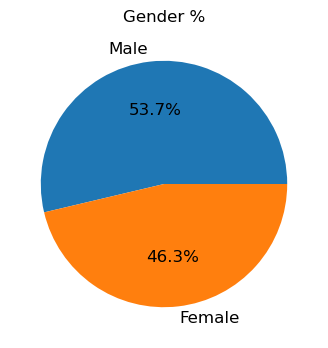

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = (df['insured_sex'].value_counts() * 100.0 / len(df))\
    .plot.pie(autopct='%.1f%%', labels=['Male', 'Female'], fontsize=12)
ax.set_title('Gender %')
ax.set(ylabel='')
plt.show()


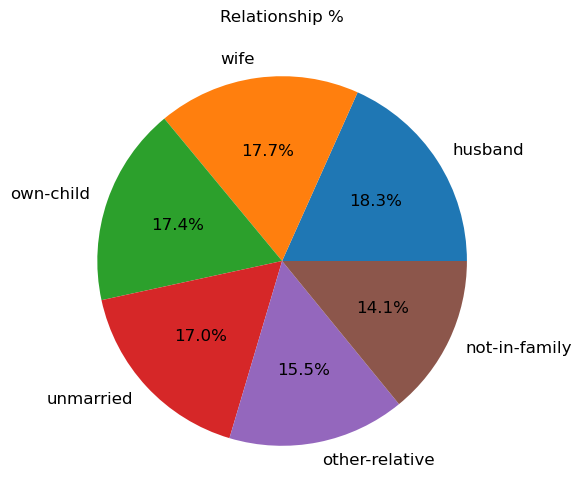

In [12]:
plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts() * 100.0 / len(df))\
    .plot.pie(autopct='%.1f%%', labels=['husband', 'wife','own-child','unmarried','other-relative','not-in-family',], fontsize=12)
ax.set_title('Relationship %')
# hide y-axis label
ax.set(ylabel='')
plt.show()


In [13]:
df.head()

,months_as_customer,Age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [14]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [15]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [16]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [17]:
df.replace('?',np.nan,inplace=True)

In [18]:
df.isna().sum()

months_as_customer               0
Age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education                0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [19]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [20]:
df.isna().sum()

months_as_customer             0
Age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education              0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [21]:
le = LabelEncoder()

In [22]:
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['insured_education'] = le.fit_transform(df['insured_education'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])


                                               

In [23]:
df.head()

,months_as_customer,Age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,2,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,27-06-2006,1,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,06-09-2000,2,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,25-05-1990,0,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,06-06-2014,0,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


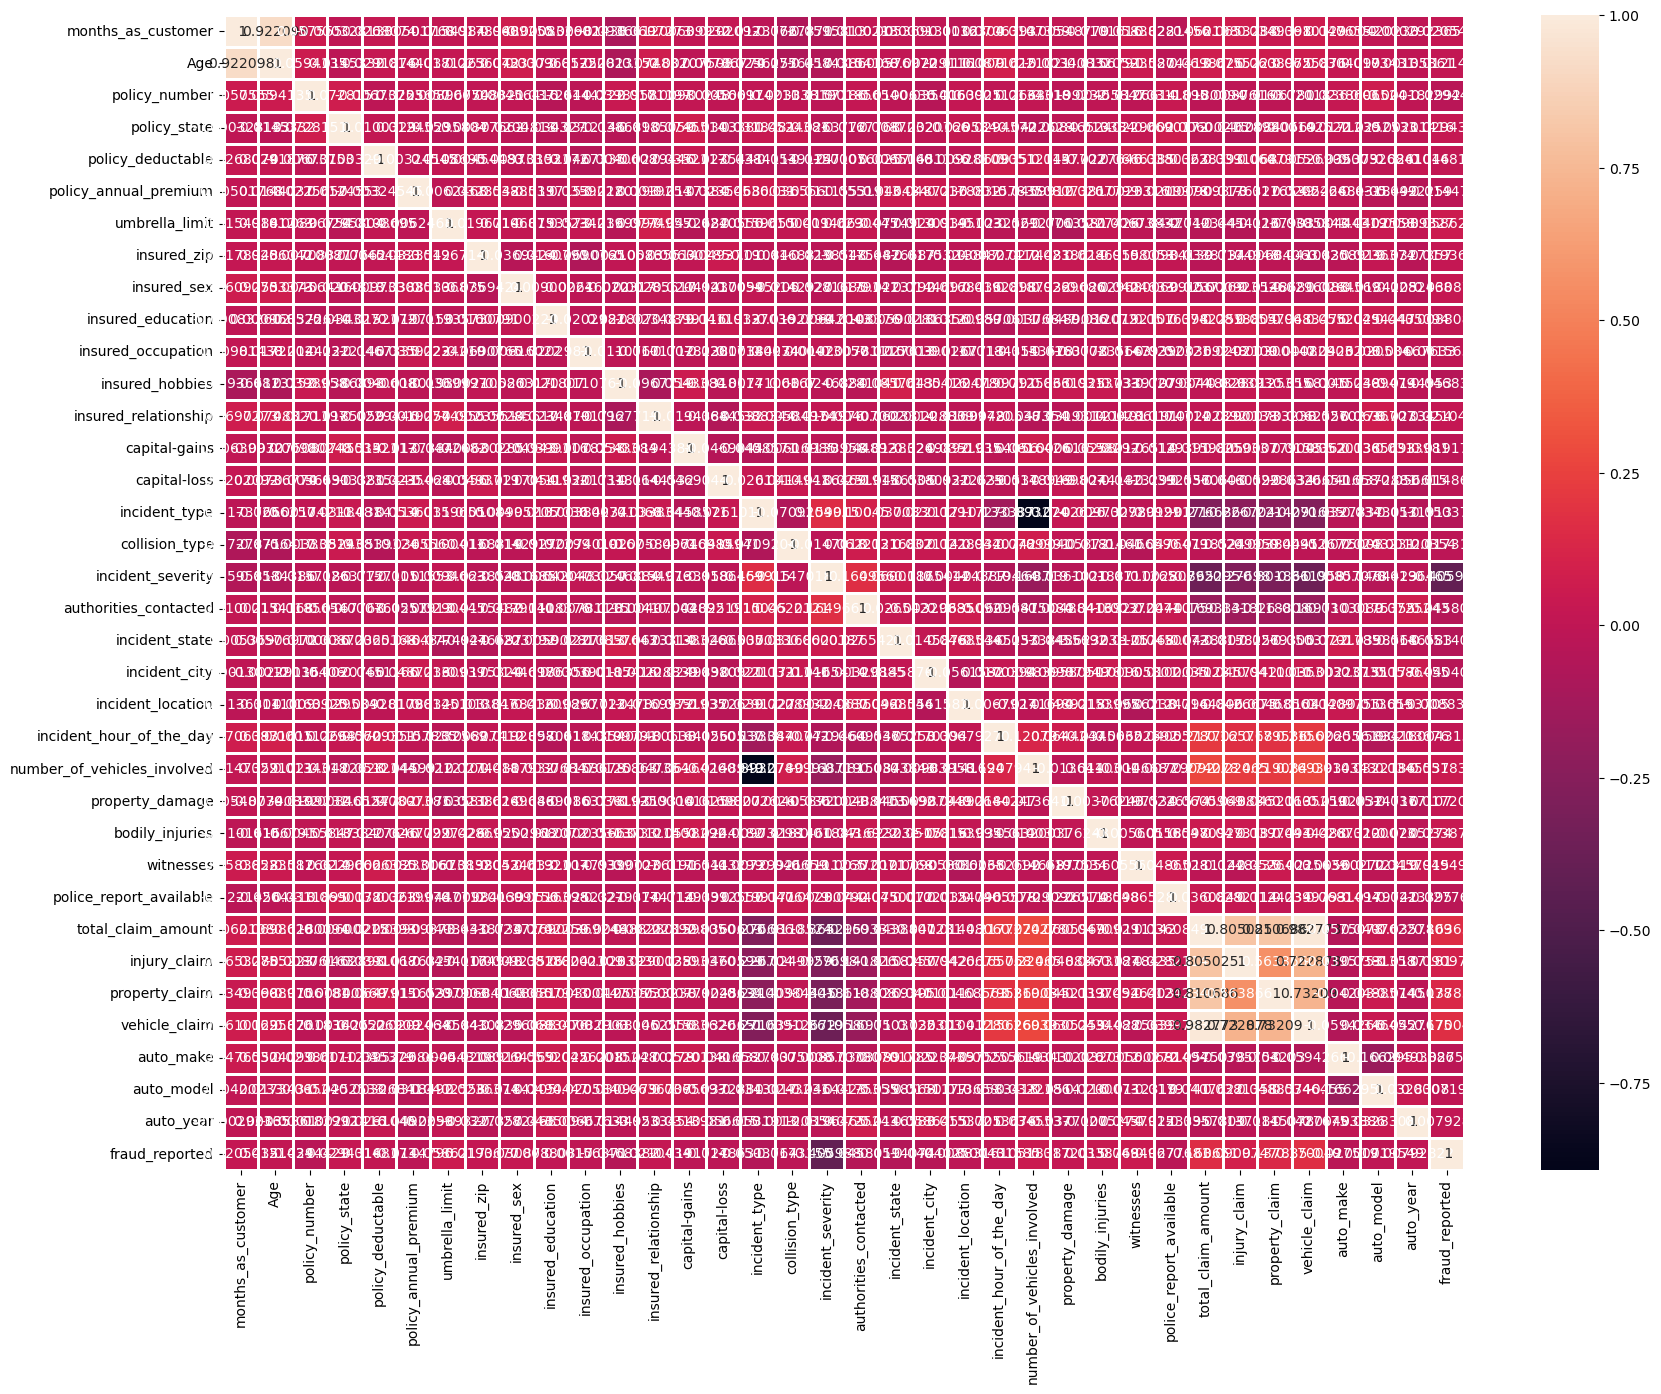

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(data = df.corr(),annot = True,fmt = '2g',linewidth = 1)
plt.show()

In [25]:
corrs = df.corr()['fraud_reported']
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
Age                            0.012143
insured_education              0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

In [26]:
df.columns

Index(['months_as_customer', 'Age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [27]:
feat = ['vehicle_claim','total_claim_amount','property_claim','injury_claim','umbrella_limit',
       'number_of_vehicles_involved','witnesses','bodily_injuries','insured_sex','policy_state','insured_relationship','months_as_customer']

In [28]:
X = df[feat]
y = df.fraud_reported

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 2,stratify = y)

In [31]:
y_train.value_counts()

0    751
1    247
Name: fraud_reported, dtype: int64

In [32]:
smt = SMOTE()
X_train,y_train = smt.fit_resample(X_train,y_train)
np.bincount(y_train)

array([751, 751], dtype=int64)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from numpy import mean
from numpy import std
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level10 = list()
    level10.append(('DT',DecisionTreeClassifier(max_depyh=10,random_state=5)))
    level10.append(('RF',RandomForestClassifier(n_estimators=500)))
    level10.append(('KNN',KNeighborsClassifier(5)))
    level10.append(('XGB',XGBClassifier(objective='binary logistic',use_label_encoder=False)))
    level1=LogisticRegression()
    #define stacking ensemble
    
    model = StackingClassifier(estimators=level10, final_estimators=level1, cv=10)
    return models
# get the models to evaluate
models = get_models

#evaluate a given  model using cross-validation
def evaluate_model(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_states=5)
    scores =cross_val_score(model,X,y, scoring='accuracy',cv=cv,n_jobs=1,error_score='raise')
    return scores

# evaluate the models and store the results
results, names = list(),list()
for name,model in models.items():
    scores = evaluate_model(model,X_train,y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)'%(name,mean(scores), std(scores)))
    
